# 4.9 Intro to Visualizations in Python

In [2]:
#importing libraries

import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [3]:
# establishing a path
path = r'C:\Users\harkn\OneDrive\Desktop\Tasks\Data Immersion\Instacart Basket Analysis'

In [4]:
# importing dataframe
df = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', '4.8 Grouping and Aggregating.pkl'))

### Creating a Bar Chart

<Axes: xlabel='orders_day_of_week'>

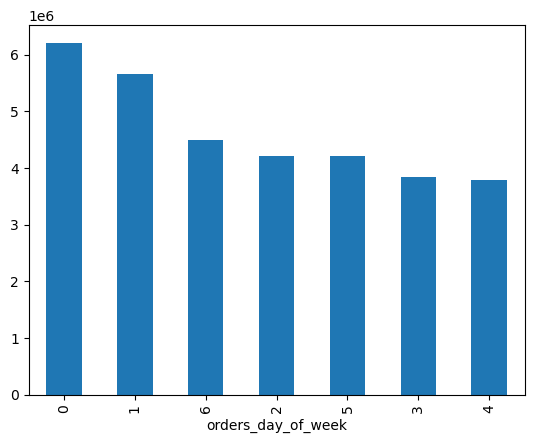

In [6]:
#plotting bar chart
df['orders_day_of_week'].value_counts().plot.bar()

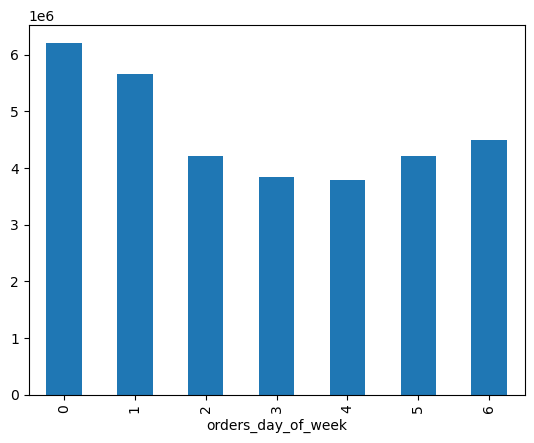

In [7]:
#indexing by order of days of week
bar = df['orders_day_of_week'].value_counts().sort_index().plot.bar()

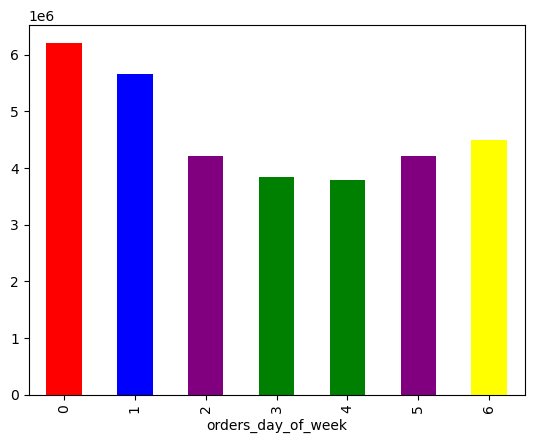

In [8]:
#adding colors
bar = df['orders_day_of_week'].value_counts().sort_index().plot.bar(color =['red','blue','purple','green','green','purple','yellow'])

In [9]:
#saving image
bar.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_orders_dow.png'))

### Histograms and Scatterplots

<Axes: ylabel='Frequency'>

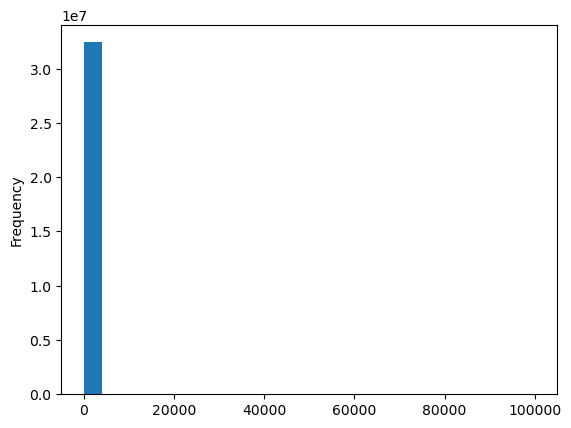

In [11]:
#creating histogram
df['prices'].plot.hist(bins = 25)

In [12]:
#describing 'prices'
df['prices'].describe()

count    3.243421e+07
mean     1.198114e+01
std      4.954311e+02
min      1.000000e+00
25%      4.200000e+00
50%      7.400000e+00
75%      1.130000e+01
max      9.999900e+04
Name: prices, dtype: float64

<Axes: xlabel='prices', ylabel='prices'>

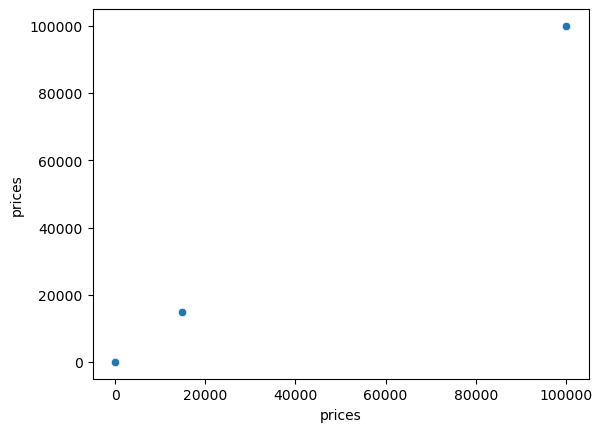

In [13]:
#creating scatterplot
sns.scatterplot(x = 'prices', y = 'prices',data = df)

In [14]:
#finding prices over $100
df.loc[df['prices'] > 100]

product_id                      product_name  aisle_id  \
13128379       21553  Lowfat 2% Milkfat Cottage Cheese       108   
13128380       21553  Lowfat 2% Milkfat Cottage Cheese       108   
13128381       21553  Lowfat 2% Milkfat Cottage Cheese       108   
13128382       21553  Lowfat 2% Milkfat Cottage Cheese       108   
13128383       21553  Lowfat 2% Milkfat Cottage Cheese       108   
...              ...                               ...       ...   
21815122       33664             2 % Reduced Fat  Milk        84   
21815123       33664             2 % Reduced Fat  Milk        84   
21815124       33664             2 % Reduced Fat  Milk        84   
21815125       33664             2 % Reduced Fat  Milk        84   
21815126       33664             2 % Reduced Fat  Milk        84   

          department_id   prices  Unnamed: 0  order_id  user_id eval_set  \
13128379             16  14900.0         171    912404       17    prior   
13128380             16  14900.0         181    603376       17    prior   
13128381             16  14900.0        1944   3264360      135    prior   
13128382             16  14900.0        1945    892534      135    prior   
13128383             16  14900.0        5708    229704      342    prior   
...                 ...      ...         ...       ...      ...      ...   
21815122             16  99999.0     3386542   2249946   204099    prior   
21815123             16  99999.0     3386544   2363282   204099    prior   
21815124             16  99999.0     3391313   3181945   204395    prior   
21815125             16  99999.0     3405096   2486215   205227    prior   
21815126             16  99999.0     3405099   2232716   205227    prior   

          order_number  orders_day_of_week  order_hour_of_day  \
13128379            12                   2                 14   
13128380            22                   6                 16   
13128381             2                   2                 21   
13128382             3                   0                  8   
13128383             8                   1                 19   
...                ...                 ...                ...   
21815122            29                   0                  8   
21815123            31                   0                  9   
21815124            13                   3                 15   
21815125             7                   3                 20   
21815126            10                   0                 11   

          days_since_prior_order  add_to_cart_order  reordered _merge  \
13128379                     5.0                  5          0   both   
13128380                     4.0                  3          1   both   
13128381                    13.0                  6          0   both   
13128382                    12.0                  3          1   both   
13128383                    30.0                  9          0   both   
...                          ...                ...        ...    ...   
21815122                     4.0                  1          0   both   
21815123                     2.0                  1          1   both   
21815124                     8.0                 25          0   both   
21815125                     4.0                  8          0   both   
21815126                     4.0                 23          1   both   

          max_order      loyalty_flag spending_flag   order_frequency_flag  
13128379         40  Regular customer  High spender      Frequent customer  
13128380         40  Regular customer  High spender      Frequent customer  
13128381          4      New customer  High spender       Regular customer  
13128382          4      New customer  High spender       Regular customer  
13128383         16  Regular customer  High spender  Non-frequent customer  
...             ...               ...           ...                    ...  
21815122         39  Regular customer  High spender      Frequent customer  
218151

In [15]:
#assigning null values to outliers
df.loc[df['prices'] >100, 'prices'] = np.nan

In [16]:
#finding max value in prices
df['prices'].max()

25.0

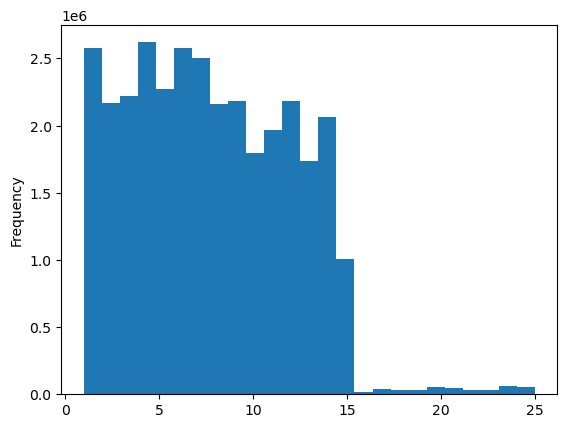

In [17]:
#creating histogram
hist = df['prices'].plot.hist(bins = 25)

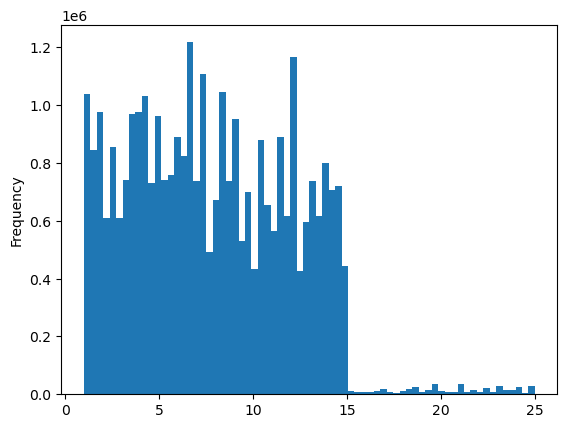

In [18]:
#more granularity
hist2 = df['prices'].plot.hist(bins = 70)

In [19]:
#exporting histogram and saving image
hist.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'hist_orders_prices.png'))

### Creating Samples

In [21]:
#setting the seed
np.random.seed(4)

In [22]:
#assigning 'dev'
dev = np.random.rand(len(df)) <= 0.7

In [23]:
#split into 'big' and 'small'
big = df[dev]
small = df[~dev]

In [24]:
#checking results
len(df)

32434212

In [25]:
len(big) + len(small)

32434212

In [26]:
#nice.

In [27]:
#creating a dataframe using only the necessary columns
df_2 = small[['orders_day_of_week','prices']]

In [28]:
df_2.head()

orders_day_of_week  prices
0                    6     5.8
2                    0     5.8
3                    3     5.8
6                    2     5.8
10                   5     5.8

### Creating a Line Chart

In [ ]:
#creating a line chart
line = sns.lineplot(data = df_2, x = 'orders_day_of_week',y = 'prices')

In [30]:
#creating smaller subset of main dataframe using only relevant columns
df_4 = df[['orders_day_of_week', 'prices']]

In [ ]:
#creating another line chart from entire dataframe, to compare
line_2 = sns.lineplot(data = df_4, x = 'orders_day_of_week',y = 'prices')